In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%run ..\Functions.ipynb

# Collocation dekadal data

In [2]:
folder1 = r'D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\0_RS-data\Data\WaPOR-CONUS'
folder2 = r'D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\0_RS-data\Data\OpenET'
folder3 = r'D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\0_RS-data\Data\OpenET_MODIS_SSEBop'
name1 = 'WaPOR_v3_L1_AETI'
name2 = 'OpenET_Models'
name3 = 'OpenET_GlobalProducts'

In [3]:
# sites with OpenET model data from 2018
stations = ['ALARC2_Smith6', 'Almond_High', 'Almond_Low', 'Almond_Med', 'BAR012', 'Ellendale', 'JPL1_Smith5', 'manilacotton', 'RIP760', 'S2', 'SLM001', 'stonevillesoy', 'UA1_HartFarm', 'UA1_JV187', 'UA1_KN18', 'UA2_JV330', 'UA2_KN20', 'UA3_JV108', 'UA3_KN15', 'US-ARM', 'US-Bi1', 'US-Bi2', 'JPL1_JV114', 'US-IB1', 'US-Ne1', 'US-Ne2', 'US-Ne3', 'US-OF4', 'US-OF6', 'US-Tw3', 'US-xSL', 'US-Me2', 'US-Me6', 'US-NC2', 'US-NC3', 'US-NR1', 'US-xRM', 'US-xSB', 'US-Hn2', 'US-IB2', 'US-KM4', 'US-Ro4', 'US-SRG', 'US-Var', 'US-Wkg', 'US-xAE', 'US-xDC', 'US-xDS', 'US-xNG', 'US-MMS', 'US-WCr', 'US-xDL', 'US-xST', 'US-xUN', 'US-Hn3', 'US-Jo2', 'US-Rwf', 'US-Rws', 'US-SRM', 'US-SRS', 'US-CMW', 'US-NC4', 'US-Sne']

In [4]:
station = 'US-Sne'
# get file paths
fh1 = os.path.join(folder1,name1+'_'+station+'.csv')
fh2 = os.path.join(folder2,name2+'_'+station+'.csv')
fh3 = os.path.join(folder3,name3+'_'+station+'.csv')

In [5]:
# get dataframes
df1 = pd.read_csv(fh1,parse_dates=True,index_col=4)
df1 = df1[['mean']]
df1 = df1.rename(columns = {'mean':'WaPORv3L1'})
df2 = pd.read_csv(fh2,parse_dates=True,index_col=0)           
df3 = pd.read_csv(fh3,parse_dates=True,index_col=0) 
# merge dataframes
df_merged = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')
df_merged = pd.merge(df_merged, df3, left_index=True, right_index=True, how='inner')
df_merged = df_merged.reset_index()
df_station = df_merged.rename(columns = {'index': 'Date'})
df_station.insert(0, 'Site ID', station)
df_station

,Site ID,Date,WaPORv3L1,geeSEBAL,PT-JPL,SSEBop,SIMS,eeMETRIC,DisALEXI,Ensemble,SSEBopv61,MOD16A2GF
0,US-Sne,2018-03-01,1.3,2.768750,3.618750,2.587500,NaN,2.737500,3.843750,2.968750,0.9,1.011719
1,US-Sne,2018-03-11,1.2,3.400000,4.033333,3.133333,NaN,3.433333,4.466667,3.500000,1.6,1.184219
2,US-Sne,2018-03-21,2.2,4.850000,4.987500,4.606250,NaN,5.231250,6.012500,4.931250,2.1,1.408949
3,US-Sne,2018-04-01,2.6,5.125000,5.468750,4.640625,NaN,4.853125,6.081250,5.103125,2.3,1.843750
4,US-Sne,2018-04-11,2.6,5.750000,6.262500,5.000000,NaN,4.575000,6.462500,5.625000,3.0,2.576563
...,...,...,...,...,...,...,...,...,...,...,...,...
58,US-Sne,2019-10-11,2.2,2.411250,3.043750,3.745000,NaN,4.597500,3.401250,3.492500,2.1,0.929688
59,US-Sne,2019-10-21,2.7,1.897727,2.846591,3.039773,NaN,3.293182,3.063636,3.027273,1.7,0.644886
60,US-Sne,2019-11-01,1.4,1.221250,2.247500,2.476250,NaN,2.217500,2.491250,2.337500,1.2,0.579375
61,US-Sne,2019-11-11,1.2,0.896875,2.267187,2.534375,NaN,2.604688,1.826563,2.300000,0.6,0.600000


In [6]:
# df_all = pd.DataFrame(columns=['Site ID', 'Date', 'WaPORv3L1', 
#                                'geeSEBAL', 'PT-JPL', 'SSEBop', 'SIMS',
#                                'eeMETRIC', 'DisALEXI', 'Ensemble'])
df_all = pd.DataFrame(columns=['Site ID', 'Date', 'WaPORv3L1', 
                               'SSEBopv61', 'MOD16A2GF'])
for i,station in enumerate(stations):
    # get file paths
    fh1 = os.path.join(folder1,name1+'_'+station+'.csv')
    fh2 = os.path.join(folder2,name2+'_'+station+'.csv')
    # get dataframes
    try:
        # get dataframes
        df1 = pd.read_csv(fh1,parse_dates=True,index_col=4)
        df1 = df1[['mean']]
        df1 = df1.rename(columns = {'mean':'WaPORv3L1'})
        df2 = pd.read_csv(fh2,parse_dates=True,index_col=0)   
        df3 = pd.read_csv(fh3,parse_dates=True,index_col=0) 
    except:
        continue
    # merge dataframes
    df_merged = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')
    df_merged = pd.merge(df_merged, df3, left_index=True, right_index=True, how='inner')
    df_merged = df_merged.reset_index()
    df_station = df_merged.rename(columns = {'index': 'Date'})
    df_station.insert(0, 'Site ID', station)   
    #append df_station
    if len(df_station)>0:
        df_all = pd.concat([df_all, df_station], ignore_index=True)

C:\Users\ntr002\AppData\Local\Temp\ipykernel_6868\3841068621.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_all, df_station], ignore_index=True)


In [7]:
df_all

,Site ID,Date,WaPORv3L1,SSEBopv61,MOD16A2GF,geeSEBAL,PT-JPL,SSEBop,SIMS,eeMETRIC,DisALEXI,Ensemble
0,ALARC2_Smith6,2018-03-01,2.20,0.9,1.011719,3.940833,4.152083,4.044167,3.259167,4.442500,3.807083,3.976667
1,ALARC2_Smith6,2018-03-11,2.30,1.6,1.184219,4.325000,4.400000,5.100000,4.175000,5.225000,4.475000,4.637500
2,ALARC2_Smith6,2018-03-21,2.75,2.1,1.408949,5.337500,5.037500,7.725000,6.387500,7.487500,6.100000,6.212500
3,ALARC2_Smith6,2018-04-01,3.10,2.3,1.843750,5.715625,5.415625,8.068750,6.628125,8.553125,6.100000,6.246875
4,ALARC2_Smith6,2018-04-11,3.10,3.0,2.576563,6.200000,6.100000,7.250000,6.250000,8.250000,6.200000,6.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
2761,US-Sne,2019-10-11,2.20,2.1,0.929688,2.411250,3.043750,3.745000,NaN,4.597500,3.401250,3.492500
2762,US-Sne,2019-10-21,2.70,1.7,0.644886,1.897727,2.846591,3.039773,NaN,3.293182,3.063636,3.027273
2763,US-Sne,2019-11-01,1.40,1.2,0.579375,1.221250,2.247500,2.476250,NaN,2.217500,2.491250,2.337500
2764,US-Sne,2019-11-11,1.20,0.6,0.600000,0.896875,2.267187,2.534375,NaN,2.604688,1.826563,2.300000


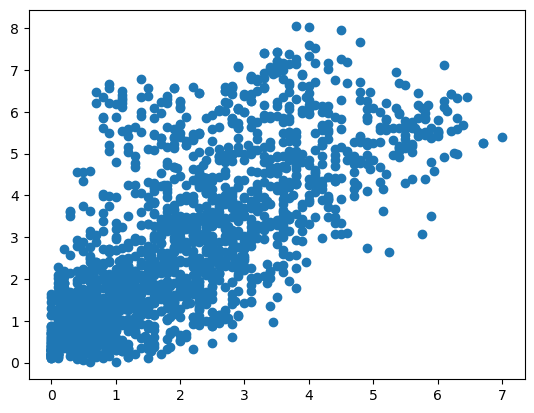

In [8]:
plt.scatter(df_all['WaPORv3L1'],df_all['Ensemble'])

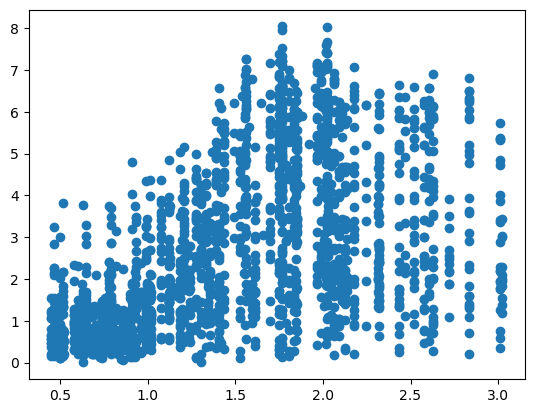

In [9]:
plt.scatter(df_all['MOD16A2GF'],df_all['Ensemble'])

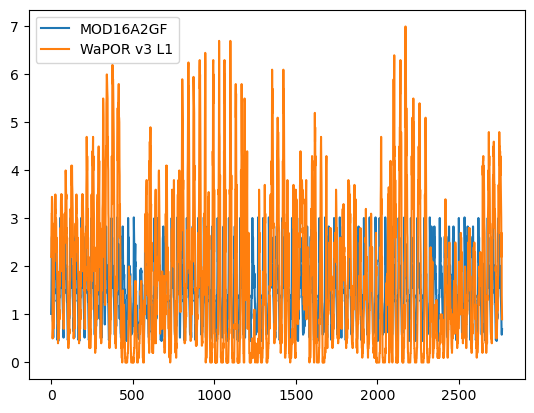

In [10]:
plt.plot(df_all.index,df_all['MOD16A2GF'],label='MOD16A2GF')
plt.plot(df_all.index,df_all['WaPORv3L1'],label='WaPOR v3 L1')
plt.legend()

<Figure size 1000x1000 with 0 Axes>

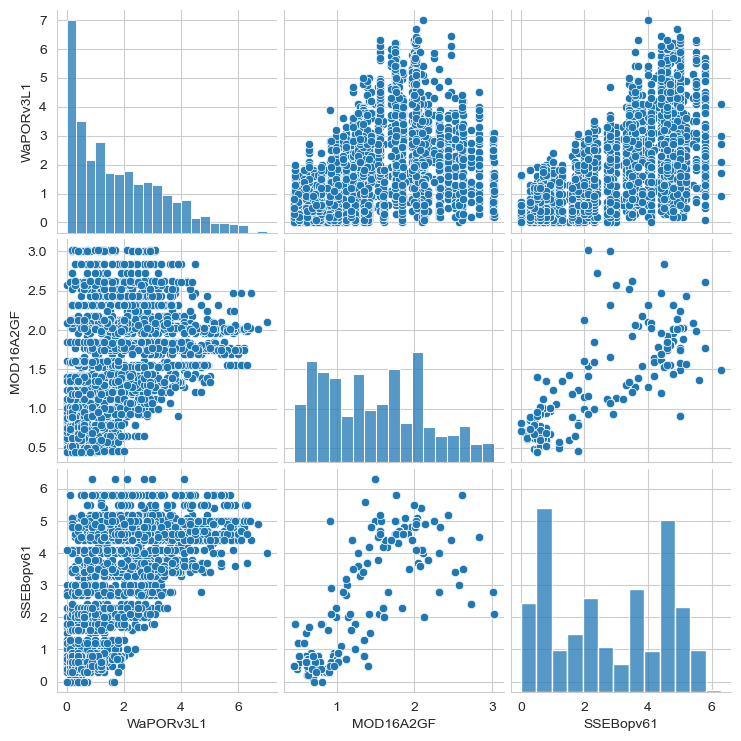

In [11]:
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")

variables_to_plot =["WaPORv3L1", "MOD16A2GF", "SSEBopv61"] 
sns.pairplot(
    data=df_all,
    vars=variables_to_plot,
)
plt.show()

# Calculate performance metrics - all data points

In [12]:
import model_evaluation.double_collocation as dc
import model_evaluation.triple_collocation as tc

In [13]:
df_all.isna().sum() #number of nans in each column

Site ID         0
Date            0
WaPORv3L1       0
SSEBopv61       0
MOD16A2GF       0
geeSEBAL      856
PT-JPL        856
SSEBop        856
SIMS         1799
eeMETRIC      856
DisALEXI      856
Ensemble      856
dtype: int64

Thus, selected models for Triple collocation:

['geeSEBAL','PT-JPL','SSEBop','eeMETRIC','DisALEXI']       

In [14]:
import itertools
models = ['geeSEBAL','PT-JPL','SSEBop','eeMETRIC','DisALEXI','SSEBopv61','MOD16A2GF']
for x in itertools.product(models, models):
    if x[0]!=x[1]:
        print(x)

('geeSEBAL', 'PT-JPL')
('geeSEBAL', 'SSEBop')
('geeSEBAL', 'eeMETRIC')
('geeSEBAL', 'DisALEXI')
('geeSEBAL', 'SSEBopv61')
('geeSEBAL', 'MOD16A2GF')
('PT-JPL', 'geeSEBAL')
('PT-JPL', 'SSEBop')
('PT-JPL', 'eeMETRIC')
('PT-JPL', 'DisALEXI')
('PT-JPL', 'SSEBopv61')
('PT-JPL', 'MOD16A2GF')
('SSEBop', 'geeSEBAL')
('SSEBop', 'PT-JPL')
('SSEBop', 'eeMETRIC')
('SSEBop', 'DisALEXI')
('SSEBop', 'SSEBopv61')
('SSEBop', 'MOD16A2GF')
('eeMETRIC', 'geeSEBAL')
('eeMETRIC', 'PT-JPL')
('eeMETRIC', 'SSEBop')
('eeMETRIC', 'DisALEXI')
('eeMETRIC', 'SSEBopv61')
('eeMETRIC', 'MOD16A2GF')
('DisALEXI', 'geeSEBAL')
('DisALEXI', 'PT-JPL')
('DisALEXI', 'SSEBop')
('DisALEXI', 'eeMETRIC')
('DisALEXI', 'SSEBopv61')
('DisALEXI', 'MOD16A2GF')
('SSEBopv61', 'geeSEBAL')
('SSEBopv61', 'PT-JPL')
('SSEBopv61', 'SSEBop')
('SSEBopv61', 'eeMETRIC')
('SSEBopv61', 'DisALEXI')
('SSEBopv61', 'MOD16A2GF')
('MOD16A2GF', 'geeSEBAL')
('MOD16A2GF', 'PT-JPL')
('MOD16A2GF', 'SSEBop')
('MOD16A2GF', 'eeMETRIC')
('MOD16A2GF', 'DisALEXI')
(

In [15]:
list_couples = [('geeSEBAL', 'PT-JPL'),
('geeSEBAL', 'SSEBop'),
('geeSEBAL', 'eeMETRIC'),
('geeSEBAL', 'DisALEXI'),
('geeSEBAL', 'SSEBopv61'),
('geeSEBAL', 'MOD16A2GF'),
('PT-JPL', 'geeSEBAL'),
('PT-JPL', 'SSEBop'),
('PT-JPL', 'eeMETRIC'),
('PT-JPL', 'DisALEXI'),
('PT-JPL', 'SSEBopv61'),
('PT-JPL', 'MOD16A2GF'),
('SSEBop', 'geeSEBAL'),
('SSEBop', 'PT-JPL'),
('SSEBop', 'eeMETRIC'),
('SSEBop', 'DisALEXI'),
('SSEBop', 'SSEBopv61'),
('SSEBop', 'MOD16A2GF'),
('eeMETRIC', 'geeSEBAL'),
('eeMETRIC', 'PT-JPL'),
('eeMETRIC', 'SSEBop'),
('eeMETRIC', 'DisALEXI'),
('eeMETRIC', 'SSEBopv61'),
('eeMETRIC', 'MOD16A2GF'),
('DisALEXI', 'geeSEBAL'),
('DisALEXI', 'PT-JPL'),
('DisALEXI', 'SSEBop'),
('DisALEXI', 'eeMETRIC'),
('DisALEXI', 'SSEBopv61'),
('DisALEXI', 'MOD16A2GF'),
('SSEBopv61', 'geeSEBAL'),
('SSEBopv61', 'PT-JPL'),
('SSEBopv61', 'SSEBop'),
('SSEBopv61', 'eeMETRIC'),
('SSEBopv61', 'DisALEXI'),
('SSEBopv61', 'MOD16A2GF'),
('MOD16A2GF', 'geeSEBAL'),
('MOD16A2GF', 'PT-JPL'),
('MOD16A2GF', 'SSEBop'),
('MOD16A2GF', 'eeMETRIC'),
('MOD16A2GF', 'DisALEXI'),
('MOD16A2GF', 'SSEBopv61')]

In [16]:
all_stderr = {}
all_rho = {}
for couple in list_couples:
    columns = ['Site ID','WaPORv3L1','Date']+list(couple)
    df_triple = df_all[columns]
    df_triple = df_triple.dropna()
    ts1=df_triple['WaPORv3L1']
    ts2=df_triple[couple[0]]
    ts3=df_triple[couple[1]]
    q_hat = tc.covariance_matrix(ts1, ts2, ts3)
    stderr, rho, snr_db, sensitivity = tc.etc(q_hat)
    all_stderr[couple]= stderr[0]
    all_rho[couple]= rho[0]

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


In [17]:
all_stderr

{('geeSEBAL', 'PT-JPL'): np.float64(0.9657233516467181),
 ('geeSEBAL', 'SSEBop'): np.float64(1.0220369103105216),
 ('geeSEBAL', 'eeMETRIC'): np.float64(1.0535748007780137),
 ('geeSEBAL', 'DisALEXI'): np.float64(1.0200425572724612),
 ('geeSEBAL', 'SSEBopv61'): np.float64(0.8053800235066276),
 ('geeSEBAL', 'MOD16A2GF'): np.float64(0.9765197185472457),
 ('PT-JPL', 'geeSEBAL'): np.float64(0.9657233516467181),
 ('PT-JPL', 'SSEBop'): np.float64(0.975556512073059),
 ('PT-JPL', 'eeMETRIC'): np.float64(0.9727491004793115),
 ('PT-JPL', 'DisALEXI'): np.float64(0.9587294761526488),
 ('PT-JPL', 'SSEBopv61'): np.float64(0.6539987562168768),
 ('PT-JPL', 'MOD16A2GF'): np.float64(0.9147284248629854),
 ('SSEBop', 'geeSEBAL'): np.float64(1.0220369103105216),
 ('SSEBop', 'PT-JPL'): np.float64(0.975556512073059),
 ('SSEBop', 'eeMETRIC'): np.float64(1.065418887221225),
 ('SSEBop', 'DisALEXI'): np.float64(1.0299576667495842),
 ('SSEBop', 'SSEBopv61'): np.float64(0.6867561965239866),
 ('SSEBop', 'MOD16A2GF'):

In [18]:
all_rho

{('geeSEBAL', 'PT-JPL'): np.float64(0.7707621420030152),
 ('geeSEBAL', 'SSEBop'): np.float64(0.7384802419670787),
 ('geeSEBAL', 'eeMETRIC'): np.float64(0.7189306432076419),
 ('geeSEBAL', 'DisALEXI'): np.float64(0.7396794497176699),
 ('geeSEBAL', 'SSEBopv61'): np.float64(0.8471595141695438),
 ('geeSEBAL', 'MOD16A2GF'): np.float64(0.7648185405560629),
 ('PT-JPL', 'geeSEBAL'): np.float64(0.7707621420030152),
 ('PT-JPL', 'SSEBop'): np.float64(0.7653533721380796),
 ('PT-JPL', 'eeMETRIC'): np.float64(0.7669070882881571),
 ('PT-JPL', 'DisALEXI'): np.float64(0.7745531018305223),
 ('PT-JPL', 'SSEBopv61'): np.float64(0.9021287728027785),
 ('PT-JPL', 'MOD16A2GF'): np.float64(0.7973782973570332),
 ('SSEBop', 'geeSEBAL'): np.float64(0.7384802419670787),
 ('SSEBop', 'PT-JPL'): np.float64(0.7653533721380796),
 ('SSEBop', 'eeMETRIC'): np.float64(0.711292840587822),
 ('SSEBop', 'DisALEXI'): np.float64(0.733674832366474),
 ('SSEBop', 'SSEBopv61'): np.float64(0.8914707907930614),
 ('SSEBop', 'MOD16A2GF')

# Calculate performance metrics - per sites

In [19]:
sites=list(df_all['Site ID'].unique())
sites

['ALARC2_Smith6',
 'Almond_High',
 'Almond_Low',
 'Almond_Med',
 'BAR012',
 'JPL1_Smith5',
 'manilacotton',
 'RIP760',
 'S2',
 'SLM001',
 'stonevillesoy',
 'UA1_HartFarm',
 'UA1_JV187',
 'UA1_KN18',
 'UA2_JV330',
 'UA2_KN20',
 'UA3_JV108',
 'UA3_KN15',
 'US-ARM',
 'US-Bi1',
 'US-Bi2',
 'US-IB1',
 'US-Ne1',
 'US-Ne2',
 'US-Ne3',
 'US-OF6',
 'US-Tw3',
 'US-xSL',
 'US-Me6',
 'US-NC2',
 'US-NC3',
 'US-NR1',
 'US-xSB',
 'US-Hn2',
 'US-IB2',
 'US-Ro4',
 'US-SRG',
 'US-Var',
 'US-Wkg',
 'US-xAE',
 'US-xDC',
 'US-xDS',
 'US-xNG',
 'US-MMS',
 'US-WCr',
 'US-xDL',
 'US-xST',
 'US-xUN',
 'US-Hn3',
 'US-Jo2',
 'US-Rwf',
 'US-Rws',
 'US-SRM',
 'US-SRS',
 'US-CMW',
 'US-NC4',
 'US-Sne']

In [20]:
sites_stderr = {'Site ID':[]}
sites_rho = {'Site ID':[]}
for couple in list_couples:
    sites_stderr[couple]=[]
    sites_rho[couple]=[]

for site in sites:
    df_site = df_all[df_all['Site ID']==site]
    sites_stderr['Site ID']+=[site]
    sites_rho['Site ID']+=[site]
    for couple in list_couples:
        columns = ['WaPORv3L1','Date']+list(couple)
        df_triple = df_site[columns]
        df_triple = df_triple.dropna()
        ts1=df_triple['WaPORv3L1']
        ts2=df_triple[couple[0]]
        ts3=df_triple[couple[1]]
        q_hat = tc.covariance_matrix(ts1, ts2, ts3)
        stderr, rho, snr_db, sensitivity = tc.etc(q_hat)
        sites_stderr[couple]+= [stderr[0]]
        sites_rho[couple]+= [rho[0]]    
    

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 2] * q_hat[1, 2]) * np.sqrt(q_hat[0, 1]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:93: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 1] * q_hat[1, 2]) * np.sqrt(q_hat[0, 2]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\e

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 2] * q_hat[1, 2]) * np.sqrt(q_hat[0, 1]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:93: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 1] * q_hat[1, 2]) * np.sqrt(q_hat[0, 2]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\e

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 2] * q_hat[1, 2]) * np.sqrt(q_hat[0, 1]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:93: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 1] * q_hat[1, 2]) * np.sqrt(q_hat[0, 2]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\e

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 2] * q_hat[1, 2]) * np.sqrt(q_hat[0, 1]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:93: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 1] * q_hat[1, 2]) * np.sqrt(q_hat[0, 2]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\e

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:107: RuntimeWarning: divide by zero encountered in log10
  snr_db = -10 * np.log10(np.asarray(snr_db))
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:107: RuntimeWarning: divide by zero encountered in log10
  snr_db = -10 * np.log10(np.asarray(snr_db))
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:107: RuntimeWarning: divide by zero encountered in log10
  snr_db = -10 * np.log10(np.asarray(snr_db))
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:107: RuntimeWarning: divide by zero encountered in log10
  snr_db = -10 * np.log10(np.asarray(snr_db))
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evalua

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:107: RuntimeWarning: divide by zero encountered in log10
  snr_db = -10 * np.log10(np.asarray(snr_db))
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:107: RuntimeWarning: divide by zero encountered in log10
  snr_db = -10 * np.log10(np.asarray(snr_db))
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:107: RuntimeWarning: divide by zero encountered in log10
  snr_db = -10 * np.log10(np.asarray(snr_db))
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:107: RuntimeWarning: divide by zero encountered in log10
  snr_db = -10 * np.log10(np.asarray(snr_db))
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evalua

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 2] * q_hat[1, 2]) * np.sqrt(q_hat[0, 1]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:93: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 1] * q_hat[1, 2]) * np.sqrt(q_hat[0, 2]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\e

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 2] * q_hat[1, 2]) * np.sqrt(q_hat[0, 1]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:93: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 1] * q_hat[1, 2]) * np.sqrt(q_hat[0, 2]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\e

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 2] * q_hat[1, 2]) * np.sqrt(q_hat[0, 1]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:93: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 1] * q_hat[1, 2]) * np.sqrt(q_hat[0, 2]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\e

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 2] * q_hat[1, 2]) * np.sqrt(q_hat[0, 1]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:93: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 1] * q_hat[1, 2]) * np.sqrt(q_hat[0, 2]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\e

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 2] * q_hat[1, 2]) * np.sqrt(q_hat[0, 1]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:93: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 1] * q_hat[1, 2]) * np.sqrt(q_hat[0, 2]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\e

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 2] * q_hat[1, 2]) * np.sqrt(q_hat[0, 1]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:93: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 1] * q_hat[1, 2]) * np.sqrt(q_hat[0, 2]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\e

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:91: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 2] * q_hat[1, 2]) * np.sqrt(q_hat[0, 1]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:93: RuntimeWarning: invalid value encountered in sqrt
  np.sign(q_hat[0, 1] * q_hat[1, 2]) * np.sqrt(q_hat[0, 2]
C:\Users\ntr002\.conda\envs\phd\Lib\site-packages\model_evaluation-0.1a0-py3.12.egg\model_evaluation\triple_collocation.py:90: RuntimeWarning: invalid value encountered in sqrt
  rho = (np.sqrt(q_hat[0, 1] * q_hat[0, 2] / (q_hat[0, 0] * q_hat[1, 2])),
C:\Users\ntr002\.conda\e

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


<div class="alert alert-block alert-danger">
<b>Error:</b> The time-series size per site is too small (<100 dekads) for triple collocation.
</div>

In [21]:
sites_stderr = {'Site ID':[]}
sites_rho = {'Site ID':[]}
for couple in list_couples:
    sites_stderr[couple]=[]
    sites_rho[couple]=[]

for site in sites:
    df_site = df_all[df_all['Site ID']==site]
    sites_stderr['Site ID']+=[site]
    sites_rho['Site ID']+=[site]
    for couple in list_couples:
        columns = ['WaPORv3L1','Date']+list(couple)
        df_triple = df_site[columns]
        df_triple = df_triple.dropna()
        if len(df_triple)<100:
            sites_stderr[couple]+= [np.nan]
            sites_rho[couple]+= [np.nan] 
            continue
        ts1=df_triple['WaPORv3L1']
        ts2=df_triple[couple[0]]
        ts3=df_triple[couple[1]]
        q_hat = tc.covariance_matrix(ts1, ts2, ts3)
        stderr, rho, snr_db, sensitivity = tc.etc(q_hat)
        sites_stderr[couple]+= [stderr[0]]
        sites_rho[couple]+= [rho[0]]    
    

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


In [22]:
sites_stderr

{'Site ID': ['ALARC2_Smith6',
  'Almond_High',
  'Almond_Low',
  'Almond_Med',
  'BAR012',
  'JPL1_Smith5',
  'manilacotton',
  'RIP760',
  'S2',
  'SLM001',
  'stonevillesoy',
  'UA1_HartFarm',
  'UA1_JV187',
  'UA1_KN18',
  'UA2_JV330',
  'UA2_KN20',
  'UA3_JV108',
  'UA3_KN15',
  'US-ARM',
  'US-Bi1',
  'US-Bi2',
  'US-IB1',
  'US-Ne1',
  'US-Ne2',
  'US-Ne3',
  'US-OF6',
  'US-Tw3',
  'US-xSL',
  'US-Me6',
  'US-NC2',
  'US-NC3',
  'US-NR1',
  'US-xSB',
  'US-Hn2',
  'US-IB2',
  'US-Ro4',
  'US-SRG',
  'US-Var',
  'US-Wkg',
  'US-xAE',
  'US-xDC',
  'US-xDS',
  'US-xNG',
  'US-MMS',
  'US-WCr',
  'US-xDL',
  'US-xST',
  'US-xUN',
  'US-Hn3',
  'US-Jo2',
  'US-Rwf',
  'US-Rws',
  'US-SRM',
  'US-SRS',
  'US-CMW',
  'US-NC4',
  'US-Sne'],
 ('geeSEBAL', 'PT-JPL'): [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  np.float64(0.3013978029754531),
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  

# Calculate performance metrics - per land cover type

In [23]:
metadata = pd.read_excel(r"..\0_insitu\fluxqaqc_station_metadata.xlsx",skiprows=1)
metadata

,Site ID,General classification,State,Data source/network,Period of record,Energy balance,Latitude,Longitude,Elevation (m),Land cover details,Land cover type,Measurement technique,Contact for sites not downloaded from AmeriFlux network,Contact email,DOI,Team member,Member role,Member institution,Member email,Site name
0,US-A32,Grasslands,OK,AmeriFlux,06/2015-06/2017,0.903129,36.819268,-97.819772,335.0,Hay pasture,Grasslands,Eddy covariance,NaN,NaN,10.17190/AMF/1436327,Lara Kueppers,PI,Lawrence Berkeley National Laboratory,lmkueppers@lbl.gov,ARM-SGP Medford hay pasture
1,US-A74,Croplands,OK,AmeriFlux,01/2016-10/2017,0.920941,36.808464,-97.548854,337.0,Sorghum,Annual crops,Eddy covariance,NaN,NaN,10.17190/AMF/1436328,Lara Kueppers,PI,Lawrence Berkeley National Laboratory,lmkueppers@lbl.gov,ARM SGP milo field
2,US-ADR,Shrublands,NV,AmeriFlux,05/2011-05/2017,0.919211,36.765278,-116.693333,842.0,Greasewood,Shrublands,Eddy covariance,NaN,NaN,10.17190/AMF/1418680,Michael Moreo,PI,U.S. Geological Survey,mtmoreo@usgs.gov,Amargosa Desert Research Site (ADRS)
3,US-AR1,Croplands,OK,AmeriFlux,06/2009-12/2012,1.089527,36.426700,-99.420000,611.0,Planted Switchgrass,Annual crops,Eddy covariance,NaN,NaN,10.17190/AMF/1246137,Dave Billesbach,PI,University of Nebraska,dbillesbach1@unl.edu,ARM USDA UNL OSU Woodward Switchgrass 1
4,US-ARb,Grasslands,OK,AmeriFlux,03/2005-10/2006,1.005785,35.549700,-98.040200,424.0,Native tallgrass prairie,Grasslands,Eddy covariance,NaN,NaN,10.17190/AMF/1246025,Margaret Torn,PI,Lawrence Berkeley National Laboratory,mstorn@lbl.gov,ARM Southern Great Plains burn site- Lamont
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,UOVLO,Shrublands,NV,USGS NWSC,07/1998-09/2000,NaN,37.045000,-116.709000,1177.0,Greasewood,Shrublands,Eddy covariance,Steve R. Reiner,srreiner@usgs.gov,10.3133/wri014239,NaN,NaN,NaN,NaN,NaN
157,UOVMD,Grasslands,NV,USGS NWSC,12/1998-09/2000,NaN,37.047000,-116.712000,1175.0,Salt Grass,Grasslands,Eddy covariance,Steve R. Reiner,srreiner@usgs.gov,10.3133/wri014239,NaN,NaN,NaN,NaN,NaN
158,UOVUP,Shrublands,NV,USGS NWSC,01/1998-09/2000,NaN,37.064000,-116.695000,1198.0,Wolfberry/Rabbitbrush,Shrublands,Eddy covariance,Steve R. Reiner,srreiner@usgs.gov,10.3133/wri014239,NaN,NaN,NaN,NaN,NaN
159,WRV_1,Shrublands,NV,USGS NWSC,09/2005-08/2007,0.994121,38.413600,-115.050900,1600.0,Greasewood,Shrublands,Eddy covariance,Michael T. Moreo,mtmoreo@usgs.gov,10.3133/sir20075078,NaN,NaN,NaN,NaN,NaN


In [24]:
LCCs = []
for i,row in df_all.iterrows():
    site = row['Site ID']
    LCC = metadata[metadata['Site ID']==site]['Land cover type'].values[0]
    LCCs.append(LCC)
df_all['LCC']=LCCs

In [25]:
LCCs=list(df_all['LCC'].unique())
LCCs

['Annual crops',
 'Orchards',
 'Vineyards',
 'Vegetable crops',
 'Evergreen Forests',
 'Grasslands',
 'Mixed Forests',
 'Shrublands',
 'Riparian',
 'Wetlands']

In [26]:
list_couples = [
('PT-JPL', 'geeSEBAL'),
('PT-JPL', 'SSEBop'),
('PT-JPL', 'eeMETRIC'),
('PT-JPL', 'DisALEXI'),
# ('PT-JPL', 'SSEBopv61'),
# ('PT-JPL', 'MOD16A2GF'),
# ('geeSEBAL', 'PT-JPL'),
('geeSEBAL', 'SSEBop'),
('geeSEBAL', 'eeMETRIC'),
('geeSEBAL', 'DisALEXI'),
# ('geeSEBAL', 'SSEBopv61'),
# ('geeSEBAL', 'MOD16A2GF'),    
# ('SSEBop', 'geeSEBAL'),
# ('SSEBop', 'PT-JPL'),
('SSEBop', 'eeMETRIC'),
('SSEBop', 'DisALEXI'),
# ('SSEBop', 'SSEBopv61'),
# ('SSEBop', 'MOD16A2GF'),
# ('eeMETRIC', 'geeSEBAL'),
# ('eeMETRIC', 'PT-JPL'),
# ('eeMETRIC', 'SSEBop'),
('eeMETRIC', 'DisALEXI'),
# ('eeMETRIC', 'SSEBopv61'),
# ('eeMETRIC', 'MOD16A2GF'),
# ('DisALEXI', 'geeSEBAL'),
# ('DisALEXI', 'PT-JPL'),
# ('DisALEXI', 'SSEBop'),
# ('DisALEXI', 'eeMETRIC'),
# ('DisALEXI', 'SSEBopv61'),
# ('DisALEXI', 'MOD16A2GF'),
# ('SSEBopv61', 'geeSEBAL'),
# ('SSEBopv61', 'PT-JPL'),
# ('SSEBopv61', 'SSEBop'),
# ('SSEBopv61', 'eeMETRIC'),
# ('SSEBopv61', 'DisALEXI'),
('SSEBopv61', 'MOD16A2GF'),
# ('MOD16A2GF', 'geeSEBAL'),
# ('MOD16A2GF', 'PT-JPL'),
# ('MOD16A2GF', 'SSEBop'),
# ('MOD16A2GF', 'eeMETRIC'),
# ('MOD16A2GF', 'DisALEXI'),
# ('MOD16A2GF', 'SSEBopv61')
               ]

Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s
Processed etc in  0.00 s


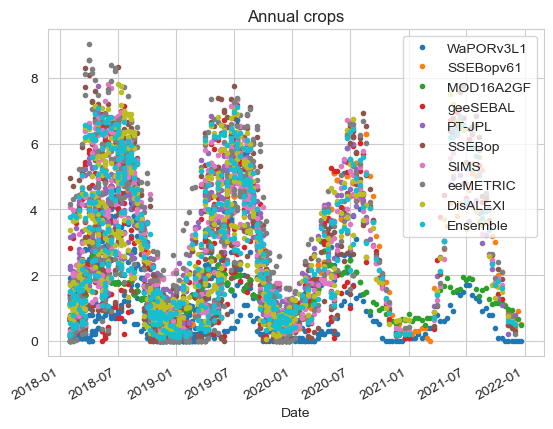

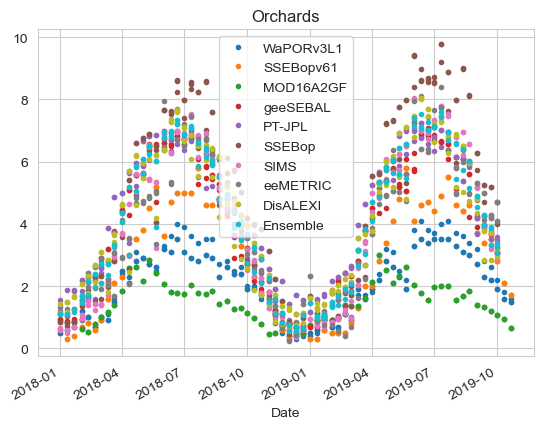

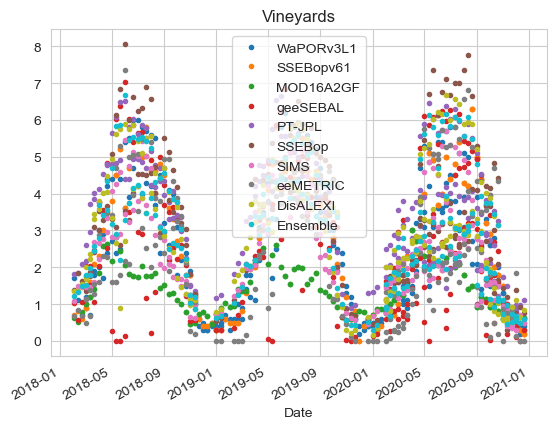

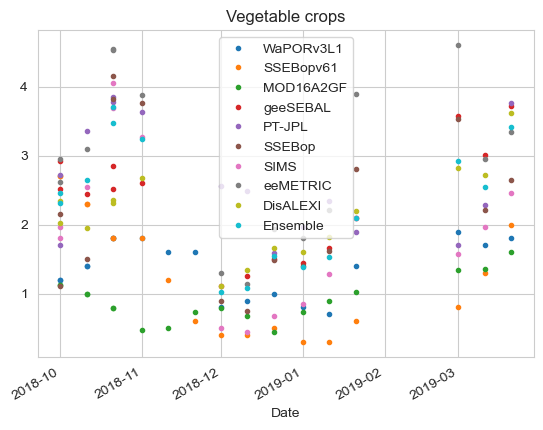

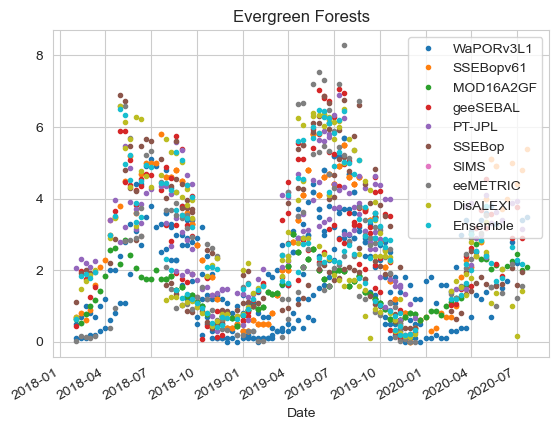

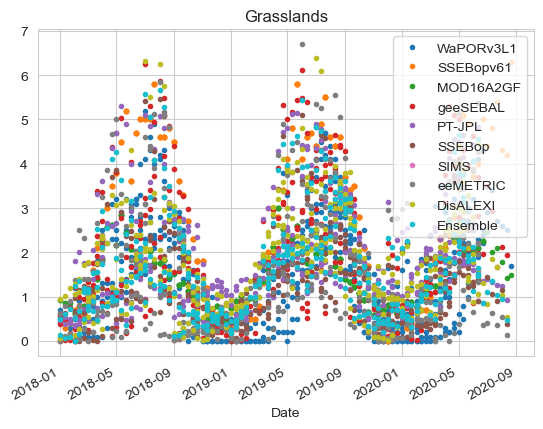

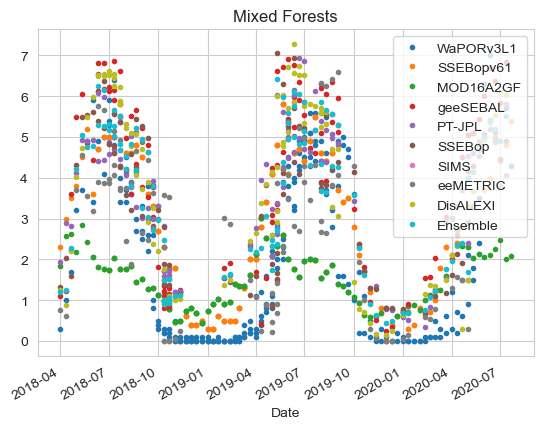

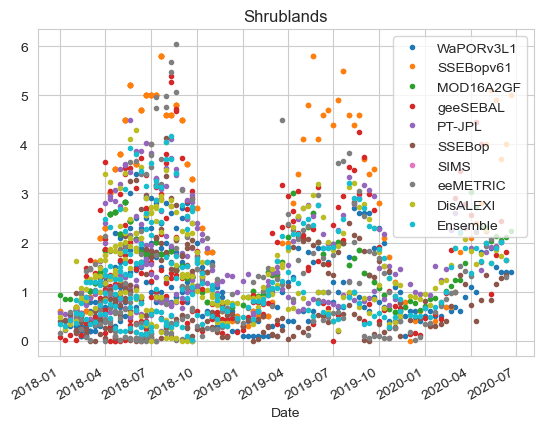

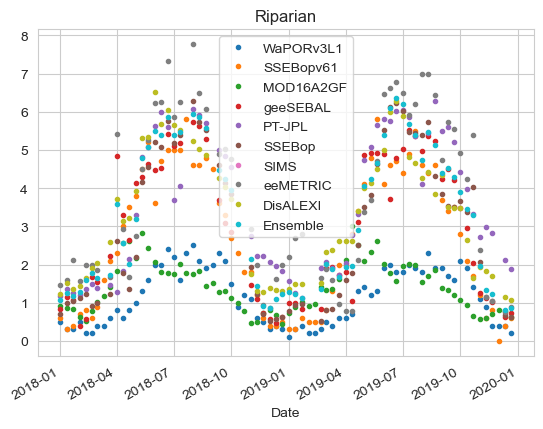

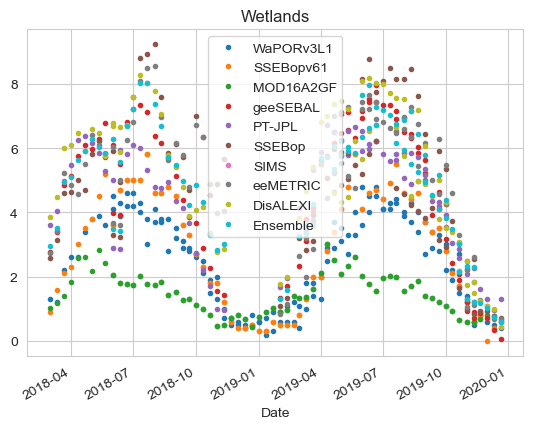

In [27]:
LCC_stderr = {'LCC':[]}
LCC_rho = {'LCC':[]}
for couple in list_couples:
    LCC_stderr[couple]=[]
    LCC_rho[couple]=[]

for LCC in LCCs:
    df_site = df_all[df_all['LCC']==LCC]
    df_site.plot(x='Date',style='.')
    plt.title(LCC)
    LCC_stderr['LCC']+=[LCC]
    LCC_rho['LCC']+=[LCC]
    for couple in list_couples:
        columns = ['WaPORv3L1','Date']+list(couple)
        df_triple = df_site[columns]
        df_triple = df_triple.dropna()
        if len(df_triple)<100:
            LCC_stderr[couple]+= [np.nan]
            LCC_rho[couple]+= [np.nan] 
            continue
        ts1=df_triple['WaPORv3L1']
        ts2=df_triple[couple[0]]
        ts3=df_triple[couple[1]]
        q_hat = tc.covariance_matrix(ts1, ts2, ts3)
        stderr, rho, snr_db, sensitivity = tc.etc(q_hat)
        LCC_stderr[couple]+= [stderr[0]]
        LCC_rho[couple]+= [rho[0]]    
    

In [28]:
pd.DataFrame(LCC_stderr).to_csv('Data/TC_dekad_stderr2.csv')
pd.DataFrame(LCC_stderr)

,LCC,"(PT-JPL, geeSEBAL)","(PT-JPL, SSEBop)","(PT-JPL, eeMETRIC)","(PT-JPL, DisALEXI)","(geeSEBAL, SSEBop)","(geeSEBAL, eeMETRIC)","(geeSEBAL, DisALEXI)","(SSEBop, eeMETRIC)","(SSEBop, DisALEXI)","(eeMETRIC, DisALEXI)","(SSEBopv61, MOD16A2GF)"
0,Annual crops,1.237825,1.199934,1.177774,1.152441,1.371955,1.341663,1.321345,1.338406,1.298313,1.244813,1.280882
1,Orchards,0.424558,0.387877,0.297108,0.444039,0.329202,0.281709,0.400776,0.333260,0.397473,0.323768,0.375604
2,Vineyards,0.704642,0.709567,0.675996,0.789413,0.618284,0.781375,0.723060,0.739523,0.688532,0.691099,0.802062
3,Vegetable crops,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Evergreen Forests,0.752133,0.682969,0.639730,0.710871,0.966295,0.947267,0.977673,1.060063,1.092410,1.032417,1.024604
5,Grasslands,0.635997,0.667240,0.702102,0.719060,0.579998,0.719099,0.709434,0.672329,0.695219,0.737309,0.837933
6,Mixed Forests,0.791090,0.828687,0.744360,0.743886,0.730532,0.827449,0.740133,0.898389,0.678399,0.427704,1.290245
7,Shrublands,0.496273,0.434005,0.486550,0.486074,0.493980,0.603086,0.547724,0.536534,0.497448,0.564117,0.616889
8,Riparian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Wetlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.418232


In [29]:
pd.DataFrame(LCC_rho).to_csv('Data/TC_dekad_rho2.csv')
pd.DataFrame(LCC_rho)

,LCC,"(PT-JPL, geeSEBAL)","(PT-JPL, SSEBop)","(PT-JPL, eeMETRIC)","(PT-JPL, DisALEXI)","(geeSEBAL, SSEBop)","(geeSEBAL, eeMETRIC)","(geeSEBAL, DisALEXI)","(SSEBop, eeMETRIC)","(SSEBop, DisALEXI)","(eeMETRIC, DisALEXI)","(SSEBopv61, MOD16A2GF)"
0,Annual crops,0.712345,0.732891,0.744357,0.756997,0.628413,0.649099,0.662361,0.651256,0.676845,0.708419,0.649620
1,Orchards,0.917859,0.931939,0.960651,0.909767,0.951464,0.964697,0.927157,0.950228,0.928399,0.953092,0.935271
2,Vineyards,0.899760,0.898275,0.908150,0.872349,0.923789,0.875121,0.894138,0.888959,0.904531,0.903780,0.881410
3,Vegetable crops,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Evergreen Forests,0.856312,0.883216,0.898352,0.872774,0.748164,0.759551,0.741162,0.685683,0.661311,0.705292,0.727213
5,Grasslands,0.809757,0.788067,0.761851,0.748266,0.844788,0.748234,0.756047,0.784377,0.767205,0.732994,0.725405
6,Mixed Forests,0.915639,0.907010,0.925701,0.925799,0.928541,0.907302,0.926576,0.889709,0.938699,0.976095,0.771947
7,Shrublands,0.742573,0.810507,0.754201,0.754760,0.745353,0.580979,0.673482,0.689695,0.741140,0.648369,0.577532
8,Riparian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Wetlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.954618
